In [1]:
#グリッドサーチの練習
#カーネルSVM

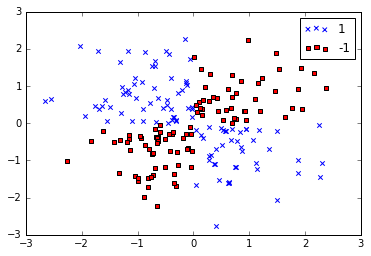

In [5]:
# 必要なライブラリを読込
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 不要な警告を非表示にする
import warnings
warnings.filterwarnings('ignore')

# XORのデータの作成

np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

# データのプロット
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best') # 右上に凡例を出力
plt.show()

In [12]:
# ホールド・アウト法による分割
from sklearn.model_selection import train_test_split
X_xor_train, X_xor_test, y_xor_train, y_xor_test = train_test_split(X_xor, y_xor, test_size=0.3, random_state=0)

In [13]:
# 調整したいパラメータを指定
param_grid = {'C': [0.1, 1.0, 10, 100, 1000, 10000],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}

In [14]:
# データの分割方法を指定（層化）
from sklearn.model_selection import StratifiedKFold
kf_5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [15]:
# GridSearchCVのインスタンスを生成
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# (モデルのインスタンス, 試したいパラメータの値, 分割方法)
gs_svc = GridSearchCV(SVC(), param_grid, cv=kf_5)

In [16]:
# GridSearchCVを利用した学習
# 最適なパラメータを自動で採用した分類器となる
gs_svc.fit(X_xor_train, y_xor_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1.0, 10, 100, 1000, 10000], 'gamma': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [17]:
# test精度の平均が最も高かった組み合わせを出力
gs_svc.best_params_

{'C': 1000, 'gamma': 0.1}